# Domain visualization

## Dependencies installation

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("ggenes")  # Установка из Bioconductor
library(ggenes)

In [ ]:
install.packages("BiocManager")
BiocManager::install(version = "3.20")

In [ ]:
my_lib <- file.path(Sys.getenv("R_LIBS_USER"))
if (!dir.exists(my_lib)) dir.create(my_lib, recursive = TRUE)

In [ ]:
install.packages(c("cluster", "foreign", "MASS", "Matrix"), 
                lib = my_lib,
                dependencies = TRUE)

In [ ]:
install.packages("gggenes")

In [1]:
library(gggenes)
library(ggplot2)

## Visualization

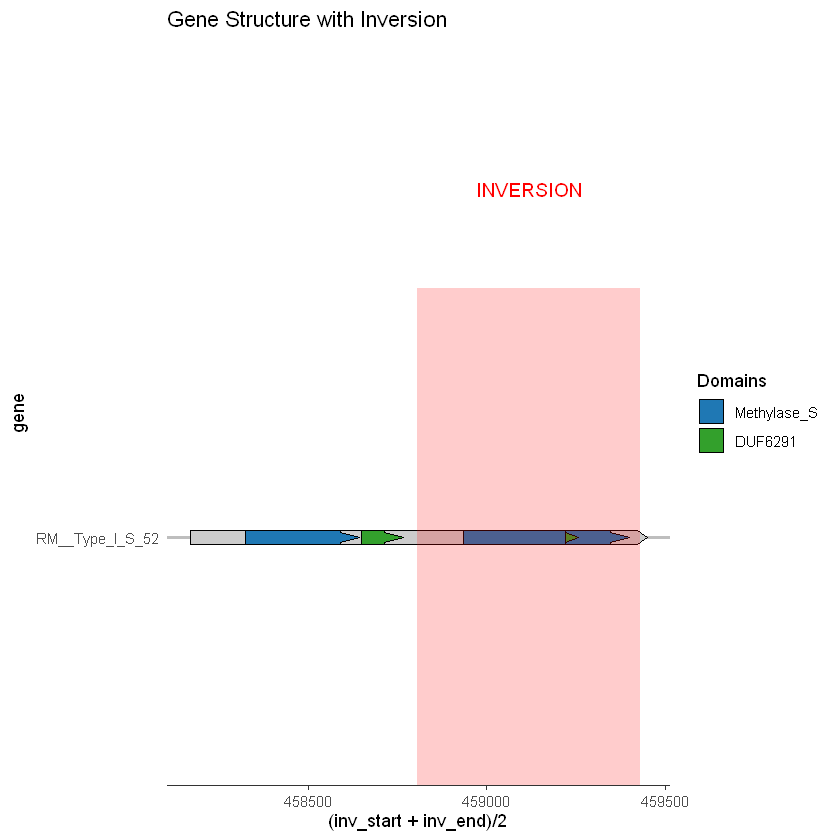

In [ ]:
genes <- data.frame(
  molecule = "NC_008533.2",
  gene = c("RM__Type_I_S_52"),
  start = c(458169),
  end = c(459449),
  strand = c("+"),
  stringsAsFactors = FALSE
)

# Domains data
domains <- data.frame(
  molecule = "NC_008533.2",
  gene = c("RM__Type_I_S_52"),
  start = c(458325, 458934, 458649, 459219),
  end = c(458643, 459399, 458766, 459255),
  domain = c("Methylase_S", "Methylase_S", "DUF6291", "DUF6291"),
  stringsAsFactors = FALSE
)

# Inversion data
inversion <- data.frame(
  molecule = "genome",
  inv_start = 458806,
  inv_end = 459431,
  stringsAsFactors = FALSE
)

# Plot with corrected y-axis handling
ggplot() +
  # 1. Main gene arrows
  geom_gene_arrow(
    data = genes,
    aes(xmin = start, xmax = end, y = gene, fill = gene),
    arrowhead_height = unit(3, "mm"),
    arrowhead_width = unit(2, "mm")
  ) +
  
  # 2. Domain sub-arrows - CORRECTED
  geom_subgene_arrow(
    data = domains,
    aes(xmin = start, xmax = end, y = gene, fill = domain,
        xsubmin = start, xsubmax = end),  # Added subgene coordinates
    arrowhead_height = unit(2, "mm")
  ) +
  
  # 3. Inversion region
  geom_rect(
    data = inversion,
    aes(xmin = inv_start, xmax = inv_end, 
        ymin = 0.5, ymax = length(unique(genes$gene)) + 0.5),
    fill = "red", alpha = 0.2, inherit.aes = FALSE
  ) +
  
  # 4. Inversion label
  geom_text(
    data = inversion,
    aes(x = (inv_start + inv_end)/2, 
        y = length(unique(genes$gene)) + 0.7,
        label = "INVERSION"),
    color = "red", size = 4, inherit.aes = FALSE
  ) +
  
  # 5. Adjust theme and scales
  theme_genes() +
  scale_fill_manual(
    values = c("RM__Type_I_S_52" = "gray80",
               "Methylase_S" = "#1f78b4", "DUF6291" = "#33a02c"),
    breaks = c("Methylase_S", "Methylase_S", "DUF6291", "DUF6291")  # Show only domains in legend
  ) +
  labs(title = "Gene Structure with Inversion",
       fill = "Domains") +
  scale_y_discrete(expand = expansion(add = c(0.5, 1)))  # Adjust y-axis padding

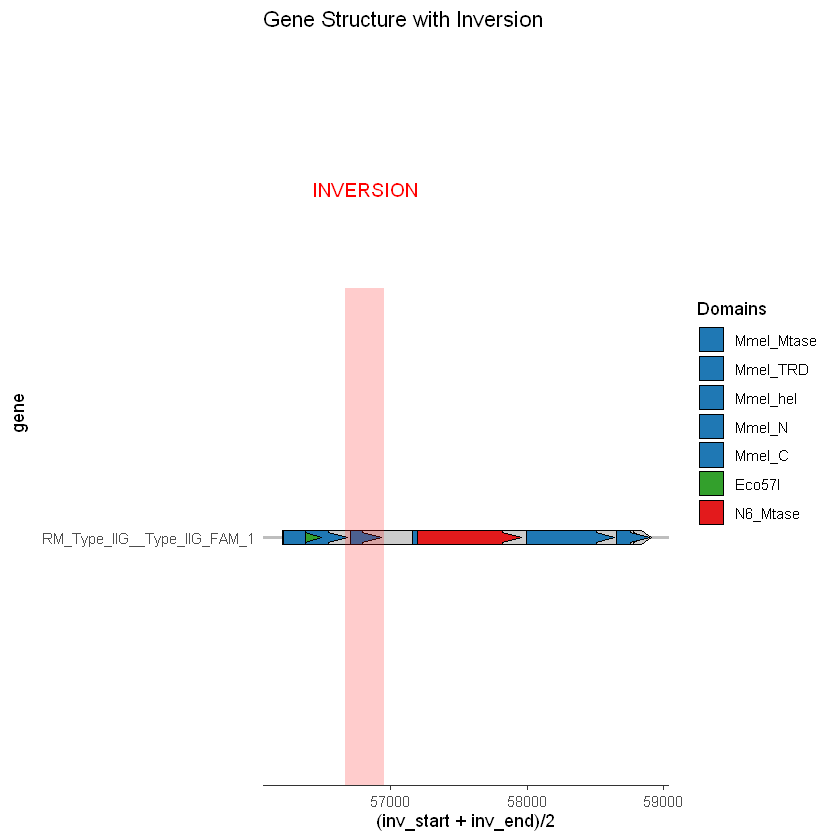

In [ ]:
genes <- data.frame(
  molecule = "NZ_CP007647.1",
  gene = c("RM_Type_IIG__Type_IIG_FAM_1"),
  start = c(56205),
  end = c(58907),
  strand = c("+"),
  stringsAsFactors = FALSE
)

# Domains data
domains <- data.frame(
  molecule = "NZ_CP007647.1",
  gene = c("RM_Type_IIG__Type_IIG_FAM_1"),
  start = c(57159, 57996, 58779, 56703, 56214, 58650, 56379, 57363, 57195),
  end = c(57939, 58641, 58875, 56931, 56682, 58896, 56493, 57789, 57954),
  domain = c("MmeI_Mtase", "MmeI_TRD", "MmeI_TRD", "MmeI_hel", "MmeI_N", "MmeI_C", "Eco57I", "Eco57I", "N6_Mtase"),
  stringsAsFactors = FALSE
)

# Inversion data
inversion <- data.frame(
  molecule = "NZ_CP007647.1",
  inv_start = 56673,
  inv_end = 56957,
  stringsAsFactors = FALSE
)

# Plot with corrected y-axis handling
ggplot() +
  # 1. Main gene arrows
  geom_gene_arrow(
    data = genes,
    aes(xmin = start, xmax = end, y = gene, fill = gene),
    arrowhead_height = unit(3, "mm"),
    arrowhead_width = unit(2, "mm")
  ) +
  
  # 2. Domain sub-arrows - CORRECTED
  geom_subgene_arrow(
    data = domains,
    aes(xmin = start, xmax = end, y = gene, fill = domain,
        xsubmin = start, xsubmax = end),  # Added subgene coordinates
    arrowhead_height = unit(2, "mm")
  ) +
  
  # 3. Inversion region
  geom_rect(
    data = inversion,
    aes(xmin = inv_start, xmax = inv_end, 
        ymin = 0.5, ymax = length(unique(genes$gene)) + 0.5),
    fill = "red", alpha = 0.2, inherit.aes = FALSE
  ) +
  
  # 4. Inversion label
  geom_text(
    data = inversion,
    aes(x = (inv_start + inv_end)/2, 
        y = length(unique(genes$gene)) + 0.7,
        label = "INVERSION"),
    color = "red", size = 4, inherit.aes = FALSE
  ) +
  
  # 5. Adjust theme and scales
  theme_genes() +
  scale_fill_manual(
    values = c(
      "RM_Type_IIG__Type_IIG_FAM_1" = "gray80",
      "MmeI_Mtase" = "#1f78b4", 
      "MmeI_TRD" = "#1f78b4",
      "MmeI_hel" = "#1f78b4",
      "MmeI_N" = "#1f78b4",
      "MmeI_C" = "#1f78b4",
      "Eco57I" = "#33a02c", 
      "N6_Mtase" = "#e31a1c"
    ),
    breaks = c("MmeI_Mtase", "MmeI_TRD", "MmeI_hel", "MmeI_N", "MmeI_C", "Eco57I", "N6_Mtase")
    ) +
  labs(title = "Gene Structure with Inversion",
       fill = "Domains") +
  scale_y_discrete(expand = expansion(add = c(0.5, 1)))  # Adjust y-axis padding

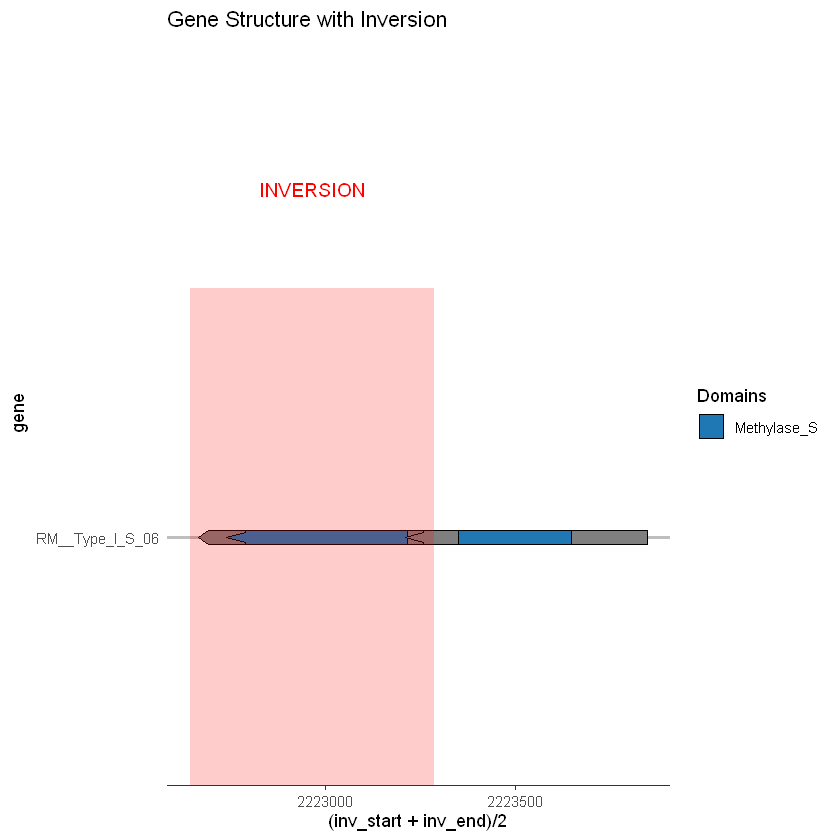

In [21]:
genes <- data.frame(
  molecule = "NZ_AP025562.1",
  gene = c("RM__Type_I_S_06"),
  start = c(2222668),
  end = c(2223846),
  strand = c("-"),
  stringsAsFactors = FALSE
)

# Domains data
domains <- data.frame(
  molecule = "NZ_AP025562.1",
  gene = c("RM__Type_I_S_06"),
  start = c(2222866, 2223298, 2223163),
  end = c(2223247, 2223772, 2223304),
  domain = c("Methylase_S", "Methylase_S", "DUF7753"),
  stringsAsFactors = FALSE
)

# Inversion data
inversion <- data.frame(
  molecule = "NZ_AP025562.1",
  inv_start = 2222646,
  inv_end = 2223287,
  stringsAsFactors = FALSE
)

adjust_domains <- function(gene_data, domain_data) {
  if (gene_data$strand == "-") {
    gene_length <- gene_data$end - gene_data$start
    # Пересчет координат доменов
    domain_data$new_start <- gene_data$end - domain_data$end + gene_data$start
    domain_data$new_end <- gene_data$end - domain_data$start + gene_data$start
    # Обновляем start и end
    domain_data$start <- domain_data$new_start
    domain_data$end <- domain_data$new_end
    domain_data$new_start <- NULL
    domain_data$new_end <- NULL
  }
  return(domain_data)
}

# Корректируем домены (если ген на "-" цепи)
domains_corrected <- adjust_domains(genes[1, ], domains)

# Визуализация
ggplot() +
  # Ген (стрелка автоматически учтет strand)
  geom_gene_arrow(
    data = genes,
    aes(xmin = start, xmax = end, y = gene, fill = gene, forward = FALSE),
    arrowhead_height = unit(3, "mm"),
    arrowhead_width = unit(2, "mm")
  ) +
  # Домены (уже пересчитаны, если нужно)
  geom_subgene_arrow(
    data = domains_corrected,
    aes(xmin = start, xmax = end, y = gene, fill = domain,
        xsubmin = start, xsubmax = end, forward = FALSE),
    arrowhead_height = unit(2, "mm")
  ) +
  geom_rect(
    data = inversion,
    aes(xmin = inv_start, xmax = inv_end, 
        ymin = 0.5, ymax = length(unique(genes$gene)) + 0.5),
    fill = "red", alpha = 0.2, inherit.aes = FALSE
  ) +
  geom_text(
    data = inversion,
    aes(x = (inv_start + inv_end)/2, 
        y = length(unique(genes$gene)) + 0.7,
        label = "INVERSION"),
    color = "red", size = 4, inherit.aes = FALSE
  ) +
  theme_genes() +
  scale_fill_manual(
    values = c("RM__Type_I_S_52" = "gray80",
               "Methylase_S" = "#1f78b4", "DUF6291" = "#33a02c"),
    breaks = c("Methylase_S", "Methylase_S", "DUF6291")
  ) +
  labs(title = "Gene Structure with Inversion",
       fill = "Domains") +
  scale_y_discrete(expand = expansion(add = c(0.5, 1)))

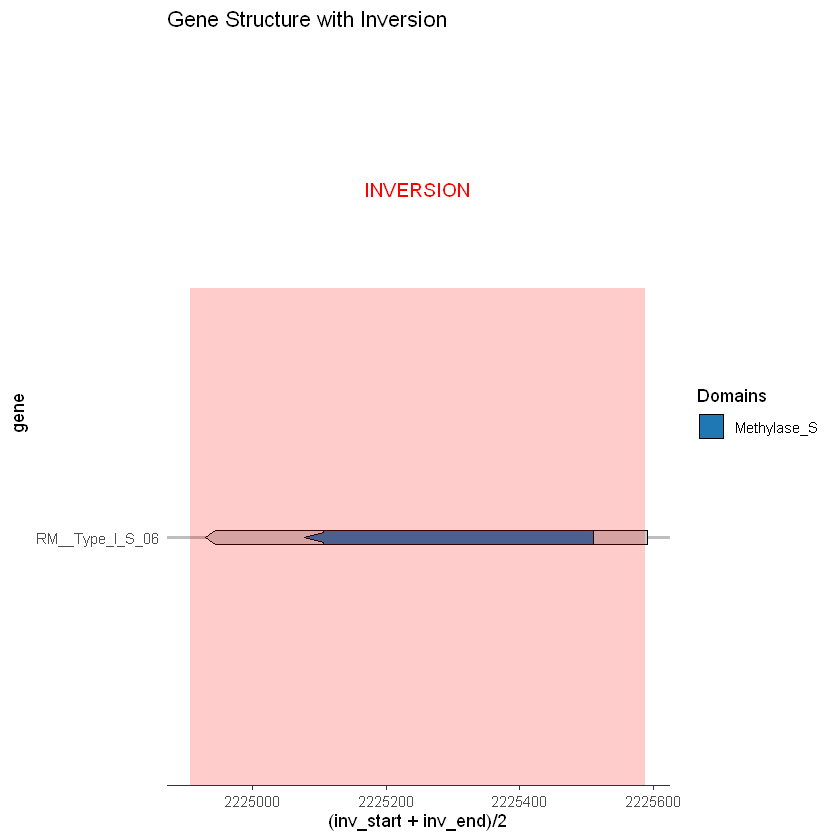

In [20]:
genes <- data.frame(
  molecule = "NZ_AP025562.1_20",
  gene = c("RM__Type_I_S_06"),
  start = c(2224929),
  end = c(2225591),
  strand = c("-"),
  stringsAsFactors = FALSE
)

# Domains data
domains <- data.frame(
  molecule = "NZ_AP025562.1_20",
  gene = c("RM__Type_I_S_06"),
  start = c(2225010),
  end = c(2225442),
  domain = c("Methylase_S"),
  stringsAsFactors = FALSE
)

# Inversion data
inversion <- data.frame(
  molecule = "NZ_AP025562.1_20",
  inv_start = 2224906,
  inv_end = 2225588,
  stringsAsFactors = FALSE
)
adjust_domains <- function(gene_data, domain_data) {
  if (gene_data$strand == "-") {
    gene_length <- gene_data$end - gene_data$start
    # Пересчет координат доменов
    domain_data$new_start <- gene_data$end - domain_data$end + gene_data$start
    domain_data$new_end <- gene_data$end - domain_data$start + gene_data$start
    # Обновляем start и end
    domain_data$start <- domain_data$new_start
    domain_data$end <- domain_data$new_end
    domain_data$new_start <- NULL
    domain_data$new_end <- NULL
  }
  return(domain_data)
}

# Корректируем домены (если ген на "-" цепи)
domains_corrected <- adjust_domains(genes[1, ], domains)

# Визуализация
ggplot() +
  # Ген (стрелка автоматически учтет strand)
  geom_gene_arrow(
    data = genes,
    aes(xmin = start, xmax = end, y = gene, fill = gene, forward = FALSE),
    arrowhead_height = unit(3, "mm"),
    arrowhead_width = unit(2, "mm")
  ) +
  # Домены (уже пересчитаны, если нужно)
  geom_subgene_arrow(
    data = domains_corrected,
    aes(xmin = start, xmax = end, y = gene, fill = domain,
        xsubmin = start, xsubmax = end, forward = FALSE),
    arrowhead_height = unit(2, "mm")
  ) +
  geom_rect(
    data = inversion,
    aes(xmin = inv_start, xmax = inv_end, 
        ymin = 0.5, ymax = length(unique(genes$gene)) + 0.5),
    fill = "red", alpha = 0.2, inherit.aes = FALSE
  ) +
  geom_text(
    data = inversion,
    aes(x = (inv_start + inv_end)/2, 
        y = length(unique(genes$gene)) + 0.7,
        label = "INVERSION"),
    color = "red", size = 4, inherit.aes = FALSE
  ) +
  theme_genes() +
  scale_fill_manual(
    values = c(
      "RM__Type_I_S_06" = "gray80",
      "Methylase_S" = "#1f78b4"
    ),
    breaks = c("Methylase_S")
    ) +
  labs(title = "Gene Structure with Inversion",
       fill = "Domains") +
  scale_y_discrete(expand = expansion(add = c(0.5, 1)))  # Adjust y-axis padding

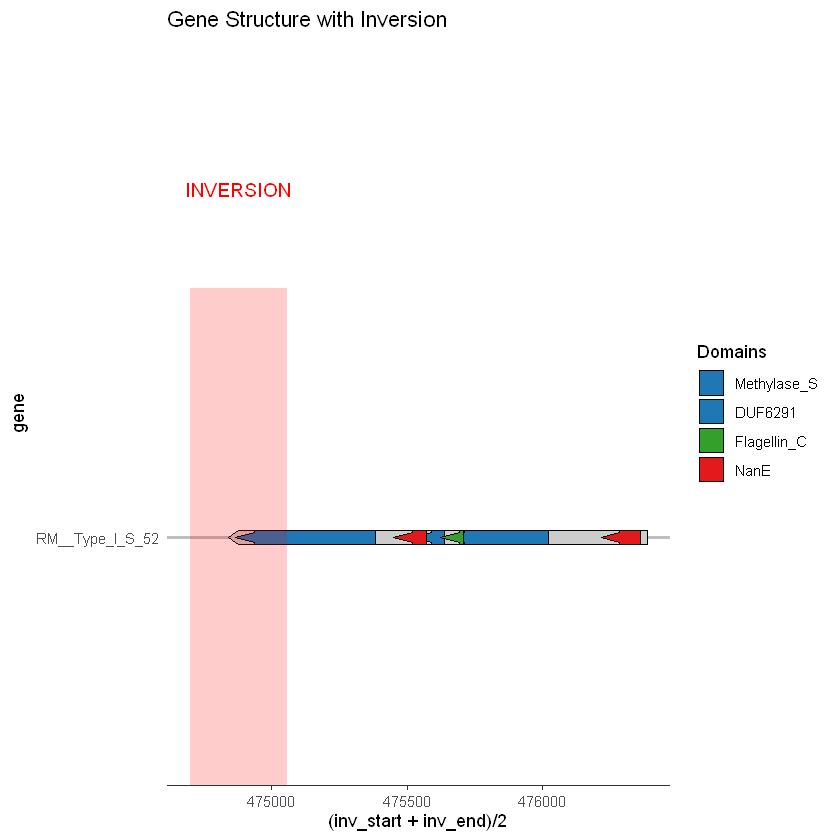

In [19]:
genes <- data.frame(
  molecule = "NZ_CP007593.1",
  gene = c("RM__Type_I_S_52"),
  start = c(474841),
  end = c(476388),
  strand = c("-"),
  stringsAsFactors = FALSE
)

# Domains data
domains <- data.frame(
  molecule = "NZ_CP007593.1",
  gene = c("RM__Type_I_S_52"),
  start = c(475207, 475846, 475591, 475522, 475672, 474865, 475657),
  end = c(475585, 476365, 475708, 475606, 475735, 475012, 475780),
  domain = c("Methylase_S", "Methylase_S", "DUF6291", "Flagellin_C", "Flagellin_C", "NanE", "NanE"),
  stringsAsFactors = FALSE
)

# Inversion data
inversion <- data.frame(
  molecule = "NZ_CP007593.1",
  inv_start = 474698,
  inv_end = 475058,
  stringsAsFactors = FALSE
)

adjust_domains <- function(gene_data, domain_data) {
  if (gene_data$strand == "-") {
    gene_length <- gene_data$end - gene_data$start
    # Пересчет координат доменов
    domain_data$new_start <- gene_data$end - domain_data$end + gene_data$start
    domain_data$new_end <- gene_data$end - domain_data$start + gene_data$start
    # Обновляем start и end
    domain_data$start <- domain_data$new_start
    domain_data$end <- domain_data$new_end
    domain_data$new_start <- NULL
    domain_data$new_end <- NULL
  }
  return(domain_data)
}

# Корректируем домены (если ген на "-" цепи)
domains_corrected <- adjust_domains(genes[1, ], domains)

# Визуализация
ggplot() +
  # Ген (стрелка автоматически учтет strand)
  geom_gene_arrow(
    data = genes,
    aes(xmin = start, xmax = end, y = gene, fill = gene, forward = FALSE),
    arrowhead_height = unit(3, "mm"),
    arrowhead_width = unit(2, "mm")
  ) +
  # Домены (уже пересчитаны, если нужно)
  geom_subgene_arrow(
    data = domains_corrected,
    aes(xmin = start, xmax = end, y = gene, fill = domain,
        xsubmin = start, xsubmax = end, forward = FALSE),
    arrowhead_height = unit(2, "mm")
  ) +
  # 3. Inversion region
  geom_rect(
    data = inversion,
    aes(xmin = inv_start, xmax = inv_end, 
        ymin = 0.5, ymax = length(unique(genes$gene)) + 0.5),
    fill = "red", alpha = 0.2, inherit.aes = FALSE
  ) +
  
  # 4. Inversion label
  geom_text(
    data = inversion,
    aes(x = (inv_start + inv_end)/2, 
        y = length(unique(genes$gene)) + 0.7,
        label = "INVERSION"),
    color = "red", size = 4, inherit.aes = FALSE
  ) +
  
  # 5. Adjust theme and scales
  theme_genes() +
  scale_fill_manual(
    values = c(
      "RM__Type_I_S_52" = "gray80",
      "Methylase_S" = "#1f78b4", 
      "Methylase_S" = "#1f78b4",
      "DUF6291" = "#1f77b4",
      "Flagellin_C" = "#33a02c",
      "Flagellin_C" = "#33a02c", 
      "NanE" = "#e31a1c",
      "NanE" = "#e31a1c"
    ),
    breaks = c("Methylase_S", "Methylase_S", "DUF6291", "Flagellin_C", "Flagellin_C", "NanE", "NanE")
    ) +
  labs(title = "Gene Structure with Inversion",
       fill = "Domains") +
  scale_y_discrete(expand = expansion(add = c(0.5, 1)))  # Adjust y-axis padding

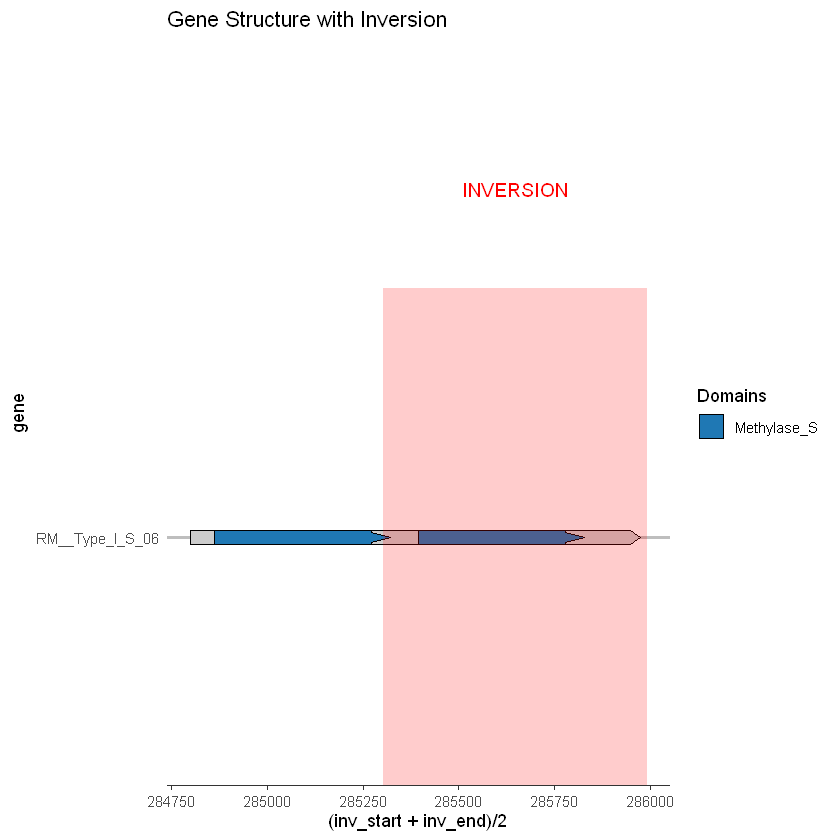

In [4]:
genes <- data.frame(
  molecule = "NZ_CP011348.1_18",
  gene = c("RM__Type_I_S_06"),
  start = c(284798),
  end = c(285973),
  strand = c("+"),
  stringsAsFactors = FALSE
)

# Domains data
domains <- data.frame(
  molecule = "NZ_CP011348.1_18",
  gene = c("RM__Type_I_S_06"),
  start = c(284861, 285395),
  end = c(285320, 285827),
  domain = c("Methylase_S", "Methylase_S"),
  stringsAsFactors = FALSE
)

# Inversion data
inversion <- data.frame(
  molecule = "NZ_CP011348.1_18",
  inv_start = 285303,
  inv_end = 285992,
  stringsAsFactors = FALSE
)

# Plot with corrected y-axis handling
ggplot() +
  # 1. Main gene arrows
  geom_gene_arrow(
    data = genes,
    aes(xmin = start, xmax = end, y = gene, fill = gene),
    arrowhead_height = unit(3, "mm"),
    arrowhead_width = unit(2, "mm")
  ) +
  
  # 2. Domain sub-arrows - CORRECTED
  geom_subgene_arrow(
    data = domains,
    aes(xmin = start, xmax = end, y = gene, fill = domain,
        xsubmin = start, xsubmax = end),  # Added subgene coordinates
    arrowhead_height = unit(2, "mm")
  ) +
  
  # 3. Inversion region
  geom_rect(
    data = inversion,
    aes(xmin = inv_start, xmax = inv_end, 
        ymin = 0.5, ymax = length(unique(genes$gene)) + 0.5),
    fill = "red", alpha = 0.2, inherit.aes = FALSE
  ) +
  
  # 4. Inversion label
  geom_text(
    data = inversion,
    aes(x = (inv_start + inv_end)/2, 
        y = length(unique(genes$gene)) + 0.7,
        label = "INVERSION"),
    color = "red", size = 4, inherit.aes = FALSE
  ) +
  
  # 5. Adjust theme and scales
  theme_genes() +
  scale_fill_manual(
    values = c(
      "RM__Type_I_S_06" = "gray80",
      "Methylase_S" = "#1f78b4", 
      "Methylase_S" = "#e31a1c"
    ),
    breaks = c("Methylase_S", "Methylase_S")
    ) +
  labs(title = "Gene Structure with Inversion",
       fill = "Domains") +
  scale_y_discrete(expand = expansion(add = c(0.5, 1)))  # Adjust y-axis padding

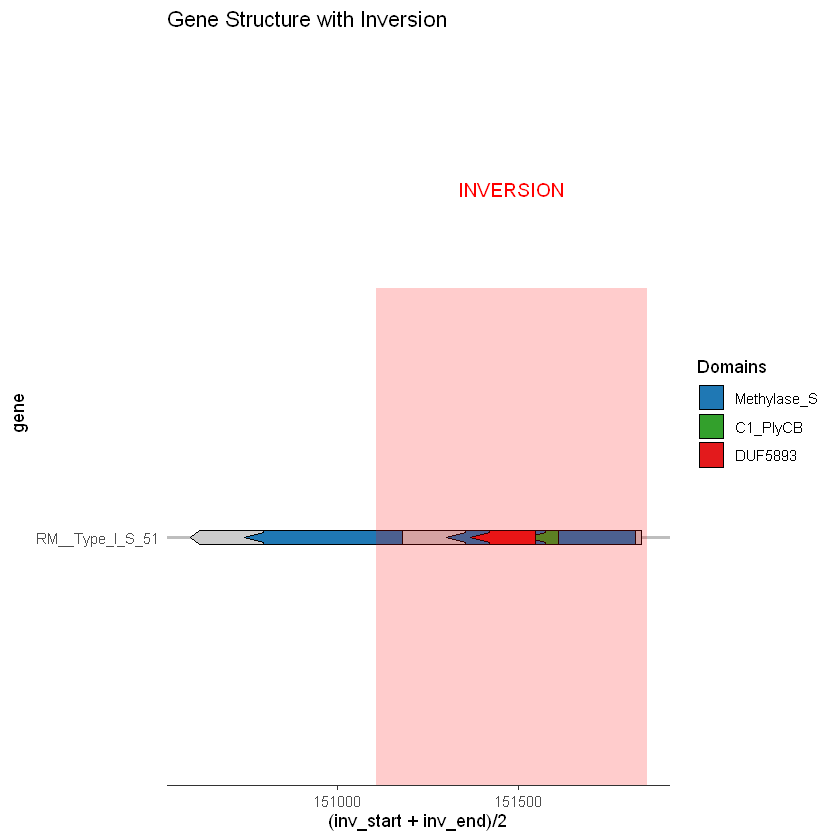

In [18]:
genes <- data.frame(
  molecule = "NZ_CP011368.1",
  gene = c("RM__Type_I_S_51"),
  start = c(150592),
  end = c(151839),
  strand = c("-"),
  stringsAsFactors = FALSE
)

# Domains data
domains <- data.frame(
  molecule = "NZ_CP011368.1",
  gene = c("RM__Type_I_S_51"),
  start = c(150607, 151252, 150820, 150883),
  end = c(151129, 151690, 150910, 151063),
  domain = c("Methylase_S", "Methylase_S", "C1_PlyCB", "DUF5893"),
  stringsAsFactors = FALSE
)

# Inversion data
inversion <- data.frame(
  molecule = "NZ_CP011368.1",
  inv_start = 151107,
  inv_end = 151856,
  stringsAsFactors = FALSE
)

adjust_domains <- function(gene_data, domain_data) {
  if (gene_data$strand == "-") {
    gene_length <- gene_data$end - gene_data$start
    # Пересчет координат доменов
    domain_data$new_start <- gene_data$end - domain_data$end + gene_data$start
    domain_data$new_end <- gene_data$end - domain_data$start + gene_data$start
    # Обновляем start и end
    domain_data$start <- domain_data$new_start
    domain_data$end <- domain_data$new_end
    domain_data$new_start <- NULL
    domain_data$new_end <- NULL
  }
  return(domain_data)
}

# Корректируем домены (если ген на "-" цепи)
domains_corrected <- adjust_domains(genes[1, ], domains)

# Визуализация
ggplot() +
  # Ген (стрелка автоматически учтет strand)
  geom_gene_arrow(
    data = genes,
    aes(xmin = start, xmax = end, y = gene, fill = gene, forward = FALSE),
    arrowhead_height = unit(3, "mm"),
    arrowhead_width = unit(2, "mm")
  ) +
  # Домены (уже пересчитаны, если нужно)
  geom_subgene_arrow(
    data = domains_corrected,
    aes(xmin = start, xmax = end, y = gene, fill = domain,
        xsubmin = start, xsubmax = end, forward = FALSE),
    arrowhead_height = unit(2, "mm")
  ) +
  # 3. Inversion region
  geom_rect(
    data = inversion,
    aes(xmin = inv_start, xmax = inv_end, 
        ymin = 0.5, ymax = length(unique(genes$gene)) + 0.5),
    fill = "red", alpha = 0.2, inherit.aes = FALSE
  ) +
  
  # 4. Inversion label
  geom_text(
    data = inversion,
    aes(x = (inv_start + inv_end)/2, 
        y = length(unique(genes$gene)) + 0.7,
        label = "INVERSION"),
    color = "red", size = 4, inherit.aes = FALSE
  ) +
  
  # 5. Adjust theme and scales
  theme_genes() +
  scale_fill_manual(
    values = c(
      "RM__Type_I_S_51" = "gray80",
      "Methylase_S" = "#1f78b4", 
      "Methylase_S" = "#1f78b4",
      "C1_PlyCB" = "#33a02c",
      "DUF5893" = "#e31a1c"
    ),
    breaks = c("Methylase_S", "Methylase_S", "C1_PlyCB", "DUF5893")
    ) +
  labs(title = "Gene Structure with Inversion",
       fill = "Domains") +
  scale_y_discrete(expand = expansion(add = c(0.5, 1)))  # Adjust y-axis padding

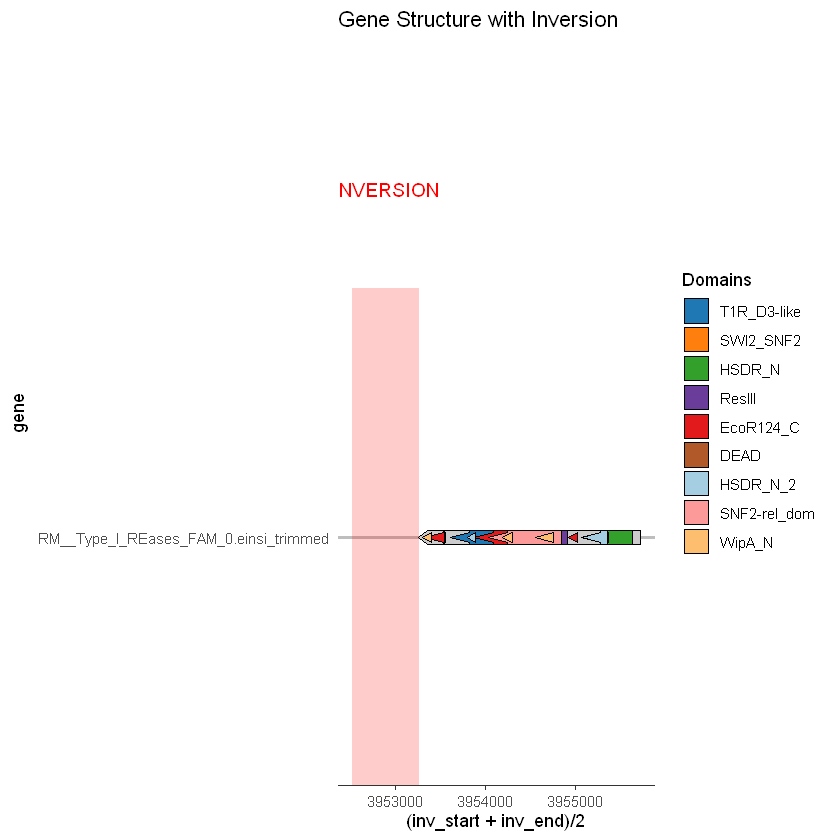

In [17]:
genes <- data.frame(
  molecule = "NZ_CP011591.1",
  gene = c("RM__Type_I_REases_FAM_0.einsi_trimmed"),
  start = c(3953251),
  end = c(3955731),
  strand = c("-"),
  stringsAsFactors = FALSE
)

# Domains data
domains <- data.frame(
  molecule = "NZ_CP011591.1",
  gene = c("RM__Type_I_REases_FAM_0.einsi_trimmed"),
  start = c(3954859, 3955423, 3954076, 3953341, 3954367, 3954724, 3954064, 3953614, 3953959, 3954403, 3955435, 3954175, 3953617, 3954418, 3955093, 3954133, 3954220, 3954682, 3955582),
  end = c(3955372, 3955543, 3954748, 3953908, 3954541, 3954820, 3954568, 3953785, 3954058, 3955099, 3955657, 3954562, 3953905, 3954520, 3955180, 3954949, 3954421, 3954787, 3955681),
  domain = c("T1R_D3-like", "T1R_D3-like", "SWI2_SNF2", "HSDR_N", "HSDR_N",
   "HSDR_N", "ResIII", "EcoR124_C", "EcoR124_C", "EcoR124_C", "EcoR124_C", "DEAD", "HSDR_N_2", "HSDR_N_2", "HSDR_N_2",
   "SNF2-rel_dom", "WipA_N", "WipA_N", "WipA_N"),
  stringsAsFactors = FALSE
)

# Inversion data
inversion <- data.frame(
  molecule = "NZ_CP011591.1",
  inv_start = 3952518,
  inv_end = 3953266,
  stringsAsFactors = FALSE
)

adjust_domains <- function(gene_data, domain_data) {
  if (gene_data$strand == "-") {
    gene_length <- gene_data$end - gene_data$start
    # Пересчет координат доменов
    domain_data$new_start <- gene_data$end - domain_data$end + gene_data$start
    domain_data$new_end <- gene_data$end - domain_data$start + gene_data$start
    # Обновляем start и end
    domain_data$start <- domain_data$new_start
    domain_data$end <- domain_data$new_end
    domain_data$new_start <- NULL
    domain_data$new_end <- NULL
  }
  return(domain_data)
}

# Корректируем домены (если ген на "-" цепи)
domains_corrected <- adjust_domains(genes[1, ], domains)

# Визуализация
ggplot() +
  # Ген (стрелка автоматически учтет strand)
  geom_gene_arrow(
    data = genes,
    aes(xmin = start, xmax = end, y = gene, fill = gene,
      forward = FALSE),
    arrowhead_height = unit(3, "mm"),
    arrowhead_width = unit(2, "mm")
  ) +
  # Домены (уже пересчитаны, если нужно)
  geom_subgene_arrow(
    data = domains_corrected,
    aes(xmin = start, xmax = end, y = gene, fill = domain,
        xsubmin = start, xsubmax = end, forward = FALSE),
    arrowhead_height = unit(2, "mm")
  ) +
  # 3. Inversion region
  geom_rect(
    data = inversion,
    aes(xmin = inv_start, xmax = inv_end, 
        ymin = 0.5, ymax = length(unique(genes$gene)) + 0.5),
    fill = "red", alpha = 0.2, inherit.aes = FALSE
  ) +
  
  # 4. Inversion label
  geom_text(
    data = inversion,
    aes(x = (inv_start + inv_end)/2, 
        y = length(unique(genes$gene)) + 0.7,
        label = "INVERSION"),
    color = "red", size = 4, inherit.aes = FALSE
  ) +
  
  # 5. Adjust theme and scales
  theme_genes() +
  scale_fill_manual(
    values = c(
      "RM__Type_I_REases_FAM_0.einsi_trimmed" = "gray80",
      "T1R_D3-like" = "#1f78b4", 
      "T1R_D3-like" = "#1f78b4",
      "SWI2_SNF2" = "#ff7f0e",
      "HSDR_N" = "#33a02c",
      "HSDR_N" = "#33a02c",
      "HSDR_N" = "#33a02c",
      "ResIII" = "#6a3d9a", 
      "EcoR124_C" = "#e31a1c",
      "EcoR124_C" = "#e31a1c",
      "EcoR124_C" = "#e31a1c",
      "EcoR124_C" = "#e31a1c",
      "DEAD" = "#b15928",
      "HSDR_N_2" = "#a6cee3",
      "HSDR_N_2" = "#a6cee3", 
      "HSDR_N_2" = "#a6cee3",
      "SNF2-rel_dom" = "#fb9a99", 
      "WipA_N" = "#fdbf6f", 
      "WipA_N" = "#fdbf6f", 
      "WipA_N" = "#fdbf6f"
    ),
    breaks = c("T1R_D3-like", "T1R_D3-like", "SWI2_SNF2", "HSDR_N", "HSDR_N",
   "HSDR_N", "ResIII", "EcoR124_C", "EcoR124_C", "EcoR124_C", "EcoR124_C", "DEAD", "HSDR_N_2", "HSDR_N_2", "HSDR_N_2",
   "SNF2-rel_dom", "WipA_N", "WipA_N", "WipA_N")
    ) +
  labs(title = "Gene Structure with Inversion",
       fill = "Domains") +
  scale_y_discrete(expand = expansion(add = c(0.5, 1)))  # Adjust y-axis padding

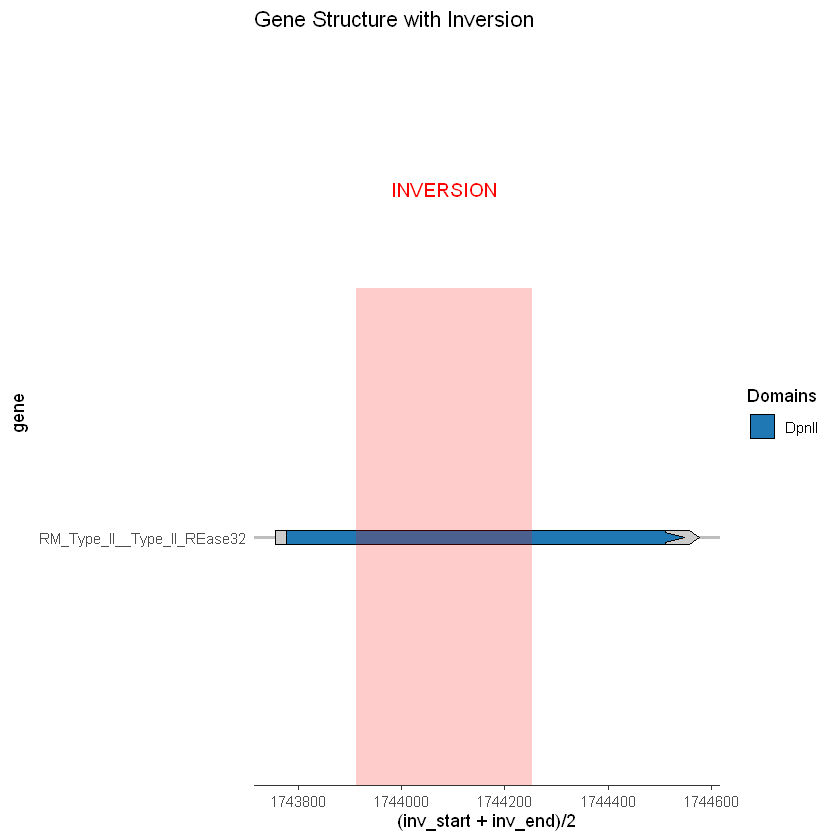

In [24]:
genes <- data.frame(
  molecule = "NZ_CP012196.1",
  gene = c("RM_Type_II__Type_II_REase32"),
  start = c(1743756),
  end = c(1744577),
  strand = c("+"),
  stringsAsFactors = FALSE
)

# Domains data
domains <- data.frame(
  molecule = "NZ_CP007593.1",
  gene = c("RM_Type_II__Type_II_REase32"),
  start = c(1743777),
  end = c(1744548),
  domain = c("DpnII"),
  stringsAsFactors = FALSE
)

# Inversion data
inversion <- data.frame(
  molecule = "NZ_CP007593.1",
  inv_start = 1743912,
  inv_end = 1744253,
  stringsAsFactors = FALSE
)

# Plot with corrected y-axis handling
ggplot() +
  # 1. Main gene arrows
  geom_gene_arrow(
    data = genes,
    aes(xmin = start, xmax = end, y = gene, fill = gene),
    arrowhead_height = unit(3, "mm"),
    arrowhead_width = unit(2, "mm")
  ) +
  
  # 2. Domain sub-arrows - CORRECTED
  geom_subgene_arrow(
    data = domains,
    aes(xmin = start, xmax = end, y = gene, fill = domain,
        xsubmin = start, xsubmax = end),  # Added subgene coordinates
    arrowhead_height = unit(2, "mm")
  ) +
  
  # 3. Inversion region
  geom_rect(
    data = inversion,
    aes(xmin = inv_start, xmax = inv_end, 
        ymin = 0.5, ymax = length(unique(genes$gene)) + 0.5),
    fill = "red", alpha = 0.2, inherit.aes = FALSE
  ) +
  
  # 4. Inversion label
  geom_text(
    data = inversion,
    aes(x = (inv_start + inv_end)/2, 
        y = length(unique(genes$gene)) + 0.7,
        label = "INVERSION"),
    color = "red", size = 4, inherit.aes = FALSE
  ) +
  
  # 5. Adjust theme and scales
  theme_genes() +
  scale_fill_manual(
    values = c(
      "RM_Type_II__Type_II_REase32" = "gray80",
      "DpnII" = "#1f78b4"
    ),
    breaks = c("DpnII")
    ) +
  labs(title = "Gene Structure with Inversion",
       fill = "Domains") +
  scale_y_discrete(expand = expansion(add = c(0.5, 1)))  # Adjust y-axis padding

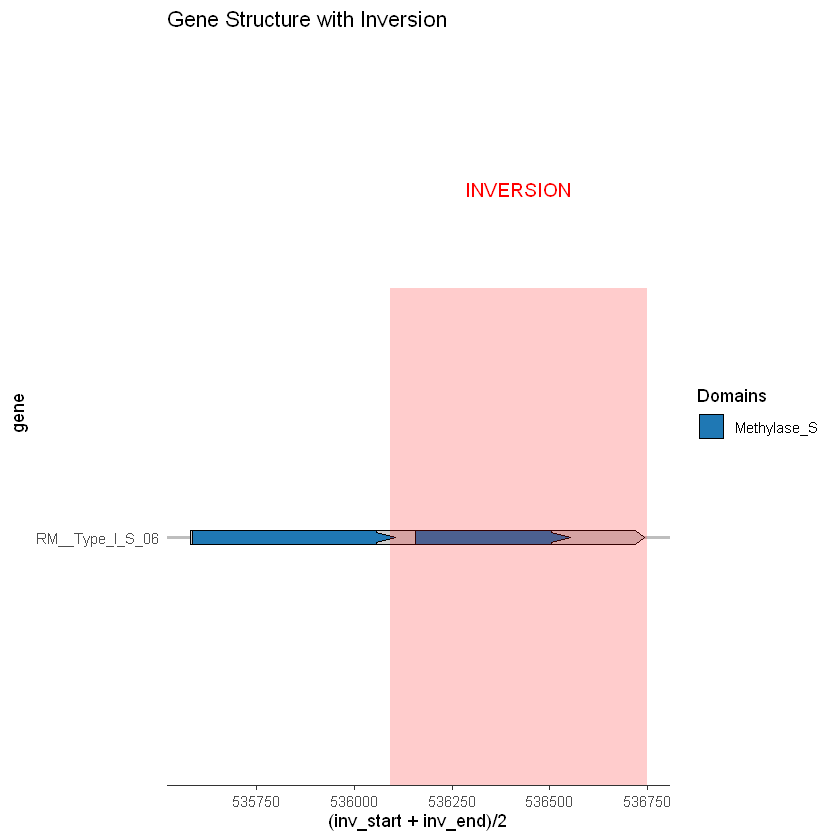

In [ ]:
genes <- data.frame(
  molecule = "NZ_CP019562.1",
  gene = c("RM__Type_I_S_06"),
  start = c(535580),
  end = c(536743),
  strand = c("+"),
  stringsAsFactors = FALSE
)

# Domains data
domains <- data.frame(
  molecule = "NZ_CP019562.1",
  gene = c("RM__Type_I_S_06"),
  start = c(535586, 536156),
  end = c(536105, 536552),
  domain = c("Methylase_S", "Methylase_S"),
  stringsAsFactors = FALSE
)

# Inversion data
inversion <- data.frame(
  molecule = "NZ_CP019562.1",
  inv_start = 536092,
  inv_end = 536749,
  stringsAsFactors = FALSE
)

# Plot with corrected y-axis handling
ggplot() +
  # 1. Main gene arrows
  geom_gene_arrow(
    data = genes,
    aes(xmin = start, xmax = end, y = gene, fill = gene),
    arrowhead_height = unit(3, "mm"),
    arrowhead_width = unit(2, "mm")
  ) +
  
  # 2. Domain sub-arrows - CORRECTED
  geom_subgene_arrow(
    data = domains,
    aes(xmin = start, xmax = end, y = gene, fill = domain,
        xsubmin = start, xsubmax = end),  # Added subgene coordinates
    arrowhead_height = unit(2, "mm")
  ) +
  
  # 3. Inversion region
  geom_rect(
    data = inversion,
    aes(xmin = inv_start, xmax = inv_end, 
        ymin = 0.5, ymax = length(unique(genes$gene)) + 0.5),
    fill = "red", alpha = 0.2, inherit.aes = FALSE
  ) +
  
  # 4. Inversion label
  geom_text(
    data = inversion,
    aes(x = (inv_start + inv_end)/2, 
        y = length(unique(genes$gene)) + 0.7,
        label = "INVERSION"),
    color = "red", size = 4, inherit.aes = FALSE
  ) +
  
  # 5. Adjust theme and scales
  theme_genes() +
  scale_fill_manual(
    values = c(
      "RM__Type_I_S_06" = "gray80",
      "Methylase_S" = "#1f78b4", 
      "Methylase_S" = "#33a02c"
    ),
    breaks = c("Methylase_S", "Methylase_S")
    ) +
  labs(title = "Gene Structure with Inversion",
       fill = "Domains") +
  scale_y_discrete(expand = expansion(add = c(0.5, 1)))  # Adjust y-axis padding

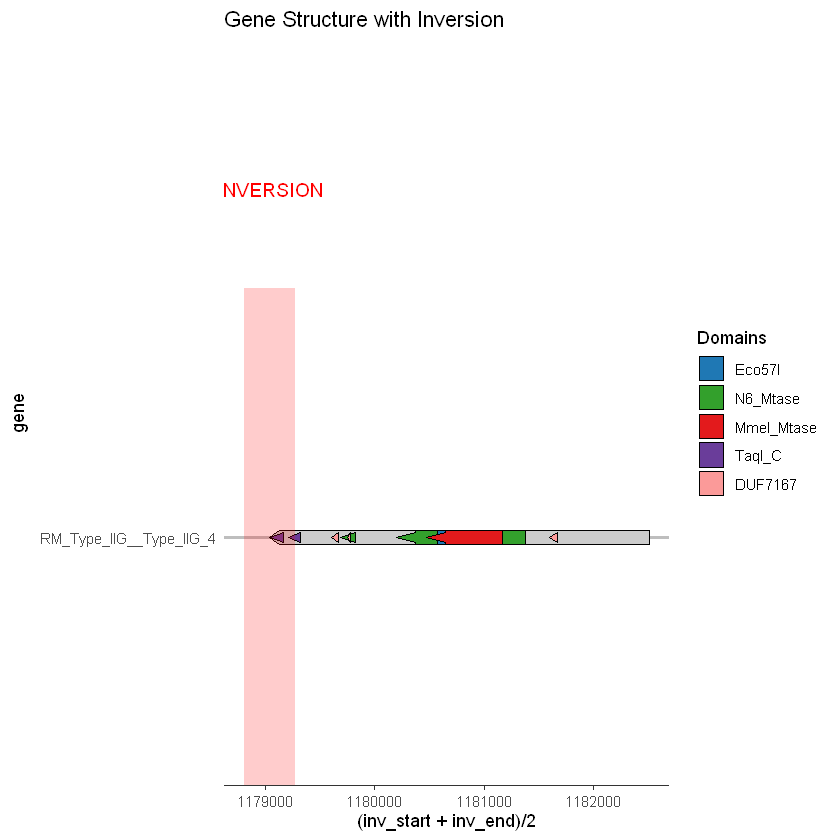

In [25]:
genes <- data.frame(
  molecule = "NZ_CP022386.1",
  gene = c("RM_Type_IIG__Type_IIG_4"),
  start = c(1179038),
  end = c(1182514),
  strand = c("-"),
  stringsAsFactors = FALSE
)

# Domains data
domains <- data.frame(
  molecule = "NZ_CP022386.1",
  gene = c("RM_Type_IIG__Type_IIG_4"),
  start = c(1180541, 1180175, 1180976, 1181729, 1180379, 1182227, 1182389, 1179878, 1181774, 1181882),
  end = c(1181249, 1180607, 1181354, 1181864, 1181078, 1182344, 1182506, 1179953, 1181804, 1181945),
  domain = c("Eco57I", "N6_Mtase", "N6_Mtase", "N6_Mtase", "MmeI_Mtase", "TaqI_C", "TaqI_C", "DUF7167", "DUF7167", "DUF7167"),
  stringsAsFactors = FALSE
)

# Inversion data
inversion <- data.frame(
  molecule = "NZ_CP022386.1",
  inv_start = 1178813,
  inv_end = 1179274,
  stringsAsFactors = FALSE
)

adjust_domains <- function(gene_data, domain_data) {
  if (gene_data$strand == "-") {
    gene_length <- gene_data$end - gene_data$start
    # Пересчет координат доменов
    domain_data$new_start <- gene_data$end - domain_data$end + gene_data$start
    domain_data$new_end <- gene_data$end - domain_data$start + gene_data$start
    # Обновляем start и end
    domain_data$start <- domain_data$new_start
    domain_data$end <- domain_data$new_end
    domain_data$new_start <- NULL
    domain_data$new_end <- NULL
  }
  return(domain_data)
}

# Корректируем домены (если ген на "-" цепи)
domains_corrected <- adjust_domains(genes[1, ], domains)

# Визуализация
ggplot() +
  # Ген (стрелка автоматически учтет strand)
  geom_gene_arrow(
    data = genes,
    aes(xmin = start, xmax = end, y = gene, fill = gene, forward = FALSE),
    arrowhead_height = unit(3, "mm"),
    arrowhead_width = unit(2, "mm")
  ) +
  # Домены (уже пересчитаны, если нужно)
  geom_subgene_arrow(
    data = domains_corrected,
    aes(xmin = start, xmax = end, y = gene, fill = domain,
        xsubmin = start, xsubmax = end, forward = FALSE),
    arrowhead_height = unit(2, "mm")
  ) +
  # 3. Inversion region
  geom_rect(
    data = inversion,
    aes(xmin = inv_start, xmax = inv_end, 
        ymin = 0.5, ymax = length(unique(genes$gene)) + 0.5),
    fill = "red", alpha = 0.2, inherit.aes = FALSE
  ) +
  
  # 4. Inversion label
  geom_text(
    data = inversion,
    aes(x = (inv_start + inv_end)/2, 
        y = length(unique(genes$gene)) + 0.7,
        label = "INVERSION"),
    color = "red", size = 4, inherit.aes = FALSE
  ) +
  
  # 5. Adjust theme and scales
  theme_genes() +
  scale_fill_manual(
    values = c(
      "RM_Type_IIG__Type_IIG_4" = "gray80",
      "Eco57I" = "#1f78b4", 
      "N6_Mtase" = "#33a02c",
      "MmeI_Mtase" = "#e31a1c",
      "TaqI_C" = "#6a3d9a",
      "DUF7167" = "#fb9a99"

    ),
    breaks = c("Eco57I", "N6_Mtase", "N6_Mtase", "N6_Mtase", "MmeI_Mtase", "TaqI_C", "TaqI_C", "DUF7167", "DUF7167", "DUF7167")
    ) +
  labs(title = "Gene Structure with Inversion",
       fill = "Domains") +
  scale_y_discrete(expand = expansion(add = c(0.5, 1)))  # Adjust y-axis padding

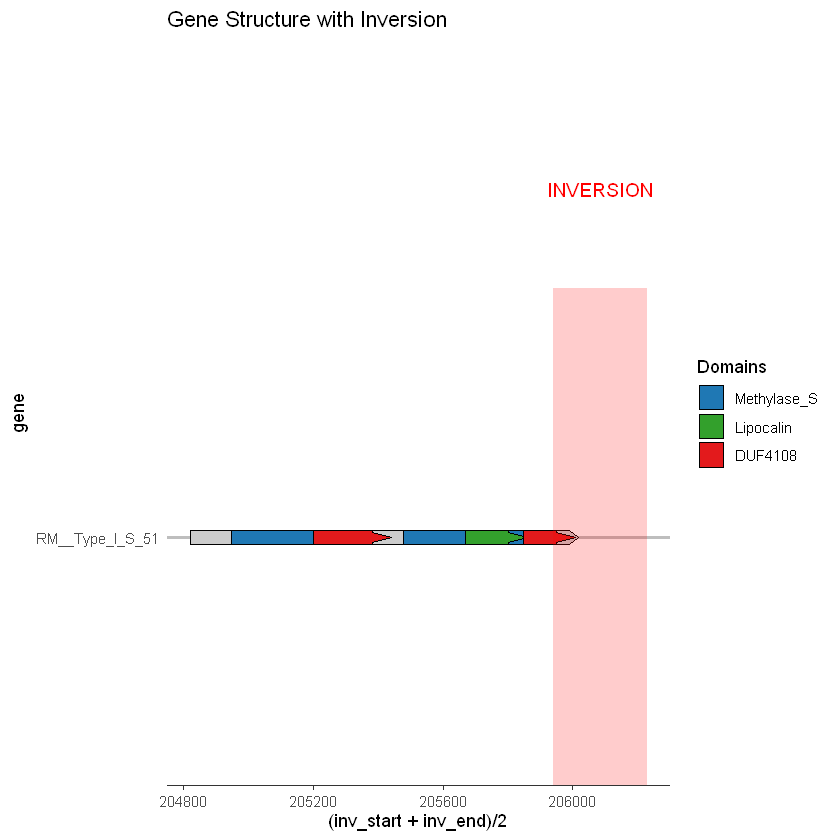

In [ ]:
genes <- data.frame(
  molecule = "NZ_CP023501.1",
  gene = c("RM__Type_I_S_51"),
  start = c(204820),
  end = c(206019),
  strand = c("+"),
  stringsAsFactors = FALSE
)

# Domains data
domains <- data.frame(
  molecule = "NZ_CP023501.1",
  gene = c("RM__Type_I_S_51"),
  start = c(204946, 205477, 205669, 205201, 205849),
  end = c(205381, 205969, 205861, 205441, 206008),
  domain = c("Methylase_S", "Methylase_S", "Lipocalin", "DUF4108", "DUF4108"),
  stringsAsFactors = FALSE
)

# Inversion data
inversion <- data.frame(
  molecule = "NZ_CP023501.1",
  inv_start = 205940,
  inv_end = 206230,
  stringsAsFactors = FALSE
)

# Plot with corrected y-axis handling
ggplot() +
  # 1. Main gene arrows
  geom_gene_arrow(
    data = genes,
    aes(xmin = start, xmax = end, y = gene, fill = gene),
    arrowhead_height = unit(3, "mm"),
    arrowhead_width = unit(2, "mm")
  ) +
  
  # 2. Domain sub-arrows - CORRECTED
  geom_subgene_arrow(
    data = domains,
    aes(xmin = start, xmax = end, y = gene, fill = domain,
        xsubmin = start, xsubmax = end),  # Added subgene coordinates
    arrowhead_height = unit(2, "mm")
  ) +
  
  # 3. Inversion region
  geom_rect(
    data = inversion,
    aes(xmin = inv_start, xmax = inv_end, 
        ymin = 0.5, ymax = length(unique(genes$gene)) + 0.5),
    fill = "red", alpha = 0.2, inherit.aes = FALSE
  ) +
  
  # 4. Inversion label
  geom_text(
    data = inversion,
    aes(x = (inv_start + inv_end)/2, 
        y = length(unique(genes$gene)) + 0.7,
        label = "INVERSION"),
    color = "red", size = 4, inherit.aes = FALSE
  ) +
  
  # 5. Adjust theme and scales
  theme_genes() +
  scale_fill_manual(
    values = c(
      "RM__Type_I_S_51" = "gray80",
      "Methylase_S" = "#1f78b4",
      "Lipocalin" = "#33a02c", 
      "DUF4108" = "#e31a1c"
    ),
    breaks = c("Methylase_S", "Methylase_S", "Lipocalin", "DUF4108", "DUF4108")
    ) +
  labs(title = "Gene Structure with Inversion",
       fill = "Domains") +
  scale_y_discrete(expand = expansion(add = c(0.5, 1)))  # Adjust y-axis padding

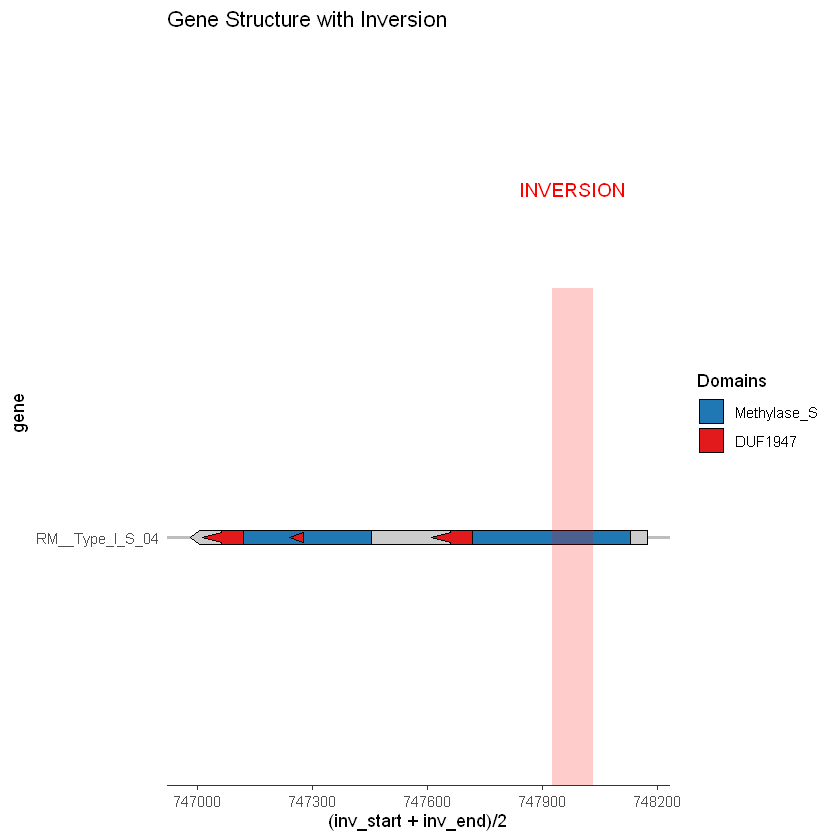

In [26]:
genes <- data.frame(
  molecule = "NZ_CP033021.1_16",
  gene = c("RM__Type_I_S_04"),
  start = c(746980),
  end = c(748173),
  strand = c("-"),
  stringsAsFactors = FALSE
)

# Domains data
domains <- data.frame(
  molecule = "NZ_CP033021.1_16",
  gene = c("RM__Type_I_S_04"),
  start = c(747025, 747700, 747436, 747877, 748033),
  end = c(747496, 748099, 747544, 747913, 748141),
  domain = c("Methylase_S", "Methylase_S", "DUF1947", "DUF1947", "DUF1947"),
  stringsAsFactors = FALSE
)

# Inversion data
inversion <- data.frame(
  molecule = "NZ_CP033021.1_16",
  inv_start = 747925,
  inv_end = 748033,
  stringsAsFactors = FALSE
)

adjust_domains <- function(gene_data, domain_data) {
  if (gene_data$strand == "-") {
    gene_length <- gene_data$end - gene_data$start
    # Пересчет координат доменов
    domain_data$new_start <- gene_data$end - domain_data$end + gene_data$start
    domain_data$new_end <- gene_data$end - domain_data$start + gene_data$start
    # Обновляем start и end
    domain_data$start <- domain_data$new_start
    domain_data$end <- domain_data$new_end
    domain_data$new_start <- NULL
    domain_data$new_end <- NULL
  }
  return(domain_data)
}

# Корректируем домены (если ген на "-" цепи)
domains_corrected <- adjust_domains(genes[1, ], domains)

# Визуализация
ggplot() +
  # Ген (стрелка автоматически учтет strand)
  geom_gene_arrow(
    data = genes,
    aes(xmin = start, xmax = end, y = gene, fill = gene, forward = FALSE),
    arrowhead_height = unit(3, "mm"),
    arrowhead_width = unit(2, "mm")
  ) +
  # Домены (уже пересчитаны, если нужно)
  geom_subgene_arrow(
    data = domains_corrected,
    aes(xmin = start, xmax = end, y = gene, fill = domain,
        xsubmin = start, xsubmax = end, forward = FALSE),
    arrowhead_height = unit(2, "mm")
  ) +
  # 3. Inversion region
  geom_rect(
    data = inversion,
    aes(xmin = inv_start, xmax = inv_end, 
        ymin = 0.5, ymax = length(unique(genes$gene)) + 0.5),
    fill = "red", alpha = 0.2, inherit.aes = FALSE
  ) +
  
  # 4. Inversion label
  geom_text(
    data = inversion,
    aes(x = (inv_start + inv_end)/2, 
        y = length(unique(genes$gene)) + 0.7,
        label = "INVERSION"),
    color = "red", size = 4, inherit.aes = FALSE
  ) +
  
  # 5. Adjust theme and scales
  theme_genes() +
  scale_fill_manual(
    values = c(
      "RM__Type_I_S_04" = "gray80",
      "Methylase_S" = "#1f78b4",
      "DUF1947" = "#e31a1c"
    ),
    breaks = c("Methylase_S", "Methylase_S", "DUF1947", "DUF1947", "DUF1947")
    ) +
  labs(title = "Gene Structure with Inversion",
       fill = "Domains") +
  scale_y_discrete(expand = expansion(add = c(0.5, 1)))  # Adjust y-axis padding

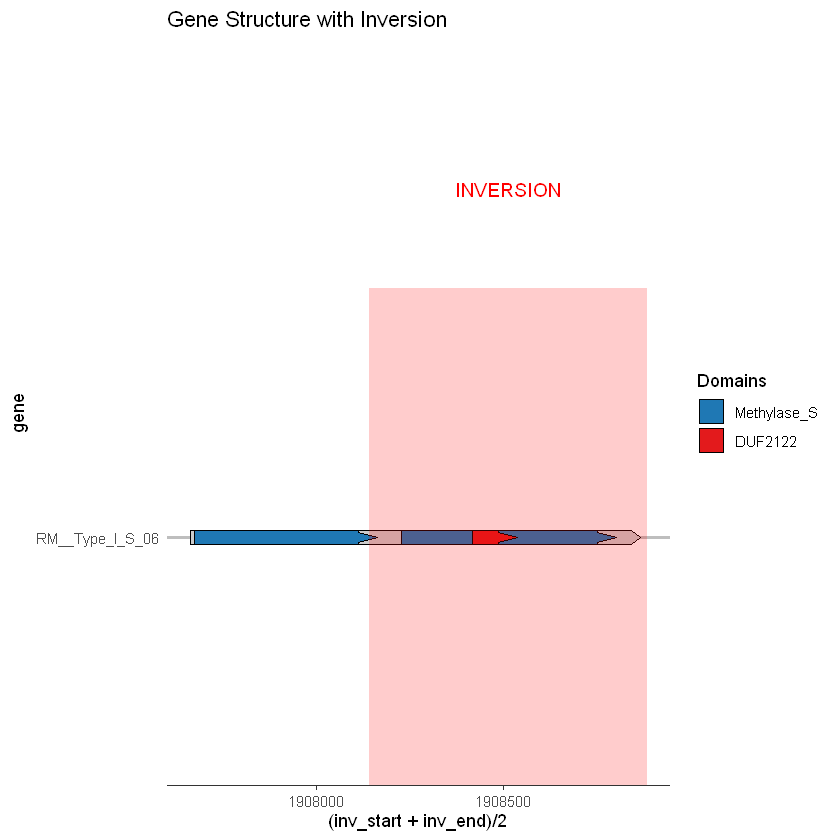

In [ ]:
genes <- data.frame(
  molecule = "NZ_CP048837.1",
  gene = c("RM__Type_I_S_06"),
  start = c(1907663),
  end = c(1908868),
  strand = c("+"),
  stringsAsFactors = FALSE
)

# Domains data
domains <- data.frame(
  molecule = "NZ_CP048837.1",
  gene = c("RM__Type_I_S_06"),
  start = c(1907675, 1908227, 1908419),
  end = c(1908164, 1908803, 1908539),
  domain = c("Methylase_S", "Methylase_S", "DUF2122"),
  stringsAsFactors = FALSE
)

# Inversion data
inversion <- data.frame(
  molecule = "NZ_CP048837.1",
  inv_start = 1908142,
  inv_end = 1908886,
  stringsAsFactors = FALSE
)

# Plot with corrected y-axis handling
ggplot() +
  # 1. Main gene arrows
  geom_gene_arrow(
    data = genes,
    aes(xmin = start, xmax = end, y = gene, fill = gene),
    arrowhead_height = unit(3, "mm"),
    arrowhead_width = unit(2, "mm")
  ) +
  
  # 2. Domain sub-arrows - CORRECTED
  geom_subgene_arrow(
    data = domains,
    aes(xmin = start, xmax = end, y = gene, fill = domain,
        xsubmin = start, xsubmax = end),  # Added subgene coordinates
    arrowhead_height = unit(2, "mm")
  ) +
  
  # 3. Inversion region
  geom_rect(
    data = inversion,
    aes(xmin = inv_start, xmax = inv_end, 
        ymin = 0.5, ymax = length(unique(genes$gene)) + 0.5),
    fill = "red", alpha = 0.2, inherit.aes = FALSE
  ) +
  
  # 4. Inversion label
  geom_text(
    data = inversion,
    aes(x = (inv_start + inv_end)/2, 
        y = length(unique(genes$gene)) + 0.7,
        label = "INVERSION"),
    color = "red", size = 4, inherit.aes = FALSE
  ) +
  
  # 5. Adjust theme and scales
  theme_genes() +
  scale_fill_manual(
    values = c(
      "RM__Type_I_S_06" = "gray80",
      "Methylase_S" = "#1f78b4", 
      "Methylase_S" = "#1f78b4",
      "DUF2122" = "#e31a1c"
    ),
    breaks = c("Methylase_S", "Methylase_S", "DUF2122")
    ) +
  labs(title = "Gene Structure with Inversion",
       fill = "Domains") +
  scale_y_discrete(expand = expansion(add = c(0.5, 1)))  # Adjust y-axis padding

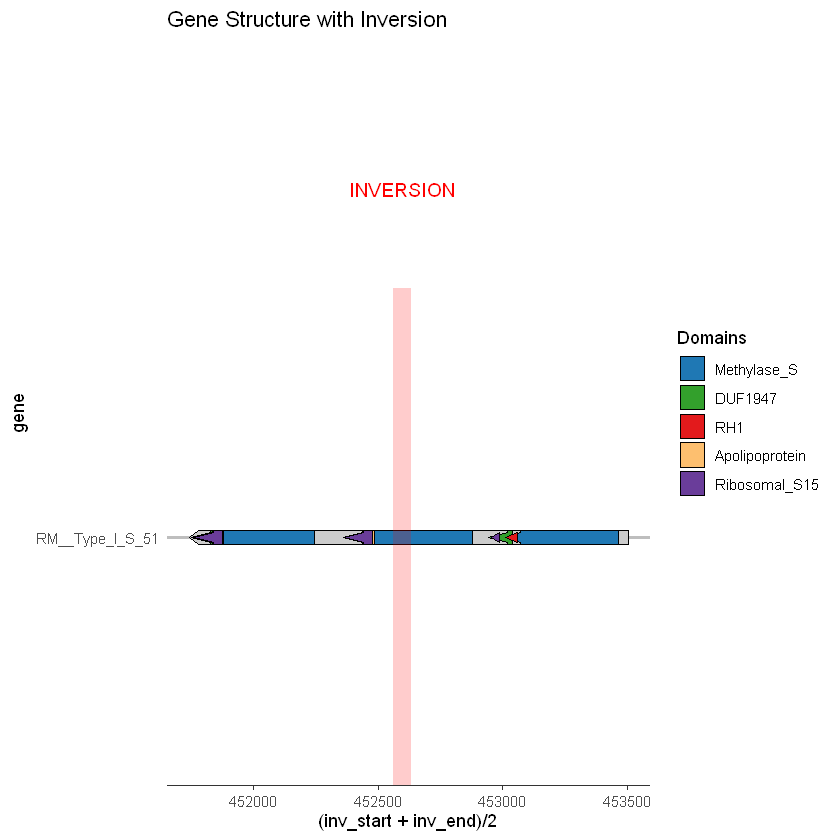

In [28]:
genes <- data.frame(
  molecule = "NZ_CP033021.1_13",
  gene = c("RM__Type_I_S_51"),
  start = c(451744),
  end = c(453504),
  strand = c("-"),
  stringsAsFactors = FALSE
)

# Domains data
domains <- data.frame(
  molecule = "NZ_CP033021.1_13",
  gene = c("RM__Type_I_S_51"),
  start = c(451783, 452368, 453001, 452209, 452782, 453385, 452191, 452764, 453367, 452764, 453367, 452260, 452770, 453373),
  end = c(452254, 452845, 453445, 452305, 452887, 453496, 452239, 452830, 453427, 452884, 453487, 452293, 452881, 453484),
  domain = c("Methylase_S", "Methylase_S", "Methylase_S", "DUF1947", "DUF1947", "DUF1947", "RH1", "RH1", "RH1", "Apolipoprotein", "Apolipoprotein", "Ribosomal_S15", "Ribosomal_S15", "Ribosomal_S15"),
  stringsAsFactors = FALSE
)

# Inversion data
inversion <- data.frame(
  molecule = "NZ_CP033021.1_13",
  inv_start = 452562,
  inv_end = 452634,
  stringsAsFactors = FALSE
)

adjust_domains <- function(gene_data, domain_data) {
  if (gene_data$strand == "-") {
    gene_length <- gene_data$end - gene_data$start
    # Пересчет координат доменов
    domain_data$new_start <- gene_data$end - domain_data$end + gene_data$start
    domain_data$new_end <- gene_data$end - domain_data$start + gene_data$start
    # Обновляем start и end
    domain_data$start <- domain_data$new_start
    domain_data$end <- domain_data$new_end
    domain_data$new_start <- NULL
    domain_data$new_end <- NULL
  }
  return(domain_data)
}

# Корректируем домены (если ген на "-" цепи)
domains_corrected <- adjust_domains(genes[1, ], domains)

# Визуализация
ggplot() +
  # Ген (стрелка автоматически учтет strand)
  geom_gene_arrow(
    data = genes,
    aes(xmin = start, xmax = end, y = gene, fill = gene, forward = FALSE),
    arrowhead_height = unit(3, "mm"),
    arrowhead_width = unit(2, "mm")
  ) +
  # Домены (уже пересчитаны, если нужно)
  geom_subgene_arrow(
    data = domains_corrected,
    aes(xmin = start, xmax = end, y = gene, fill = domain,
        xsubmin = start, xsubmax = end, forward = FALSE),
    arrowhead_height = unit(2, "mm")
  ) +
  
  # 3. Inversion region
  geom_rect(
    data = inversion,
    aes(xmin = inv_start, xmax = inv_end, 
        ymin = 0.5, ymax = length(unique(genes$gene)) + 0.5),
    fill = "red", alpha = 0.2, inherit.aes = FALSE
  ) +
  
  # 4. Inversion label
  geom_text(
    data = inversion,
    aes(x = (inv_start + inv_end)/2, 
        y = length(unique(genes$gene)) + 0.7,
        label = "INVERSION"),
    color = "red", size = 4, inherit.aes = FALSE
  ) +
  
  # 5. Adjust theme and scales
  theme_genes() +
  scale_fill_manual(
    values = c(
      "RM__Type_I_S_51" = "gray80",
      "Methylase_S" = "#1f78b4", 
      "Methylase_S" = "#1f78b4",
      "Methylase_S" = "#1f78b4",
      "DUF1947" = "#33a02c",
      "DUF1947" = "#33a02c",
      "DUF1947" = "#33a02c", 
      "RH1" = "#e31a1c",
      "RH1" = "#e31a1c",
      "RH1" = "#e31a1c",
      "Apolipoprotein" = "#fdbf6f",
      "Apolipoprotein" = "#fdbf6f",
      "Ribosomal_S15" = "#6a3d9a",
      "Ribosomal_S15" = "#6a3d9a",
      "Ribosomal_S15" = "#6a3d9a"
    ),
    breaks = c("Methylase_S", "Methylase_S", "Methylase_S", "DUF1947", "DUF1947", "DUF1947", "RH1", "RH1", "RH1", "Apolipoprotein", "Apolipoprotein", "Ribosomal_S15", "Ribosomal_S15", "Ribosomal_S15")
    ) +
  labs(title = "Gene Structure with Inversion",
       fill = "Domains") +
  scale_y_discrete(expand = expansion(add = c(0.5, 1)))  # Adjust y-axis padding

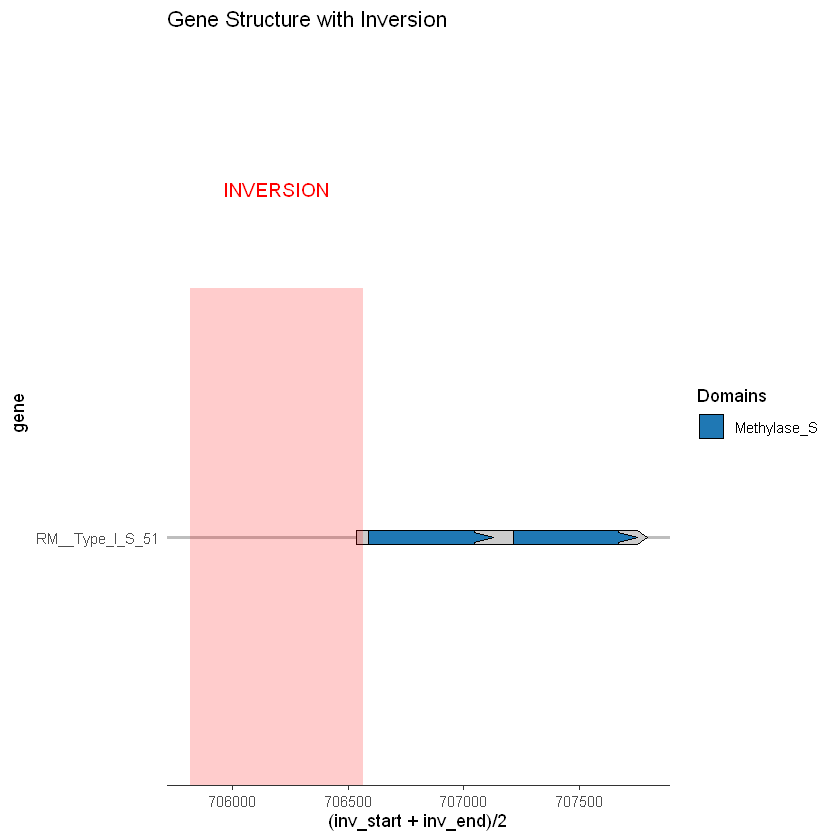

In [ ]:
genes <- data.frame(
  molecule = "NZ_CP034841.1",
  gene = c("RM__Type_I_S_51"),
  start = c(706535),
  end = c(707794),
  strand = c("+"),
  stringsAsFactors = FALSE
)

# Domains data
domains <- data.frame(
  molecule = "NZ_CP034841.1",
  gene = c("RM__Type_I_S_51"),
  start = c(706589, 707216),
  end = c(707126, 707753),
  domain = c("Methylase_S", "Methylase_S"),
  stringsAsFactors = FALSE
)

# Inversion data
inversion <- data.frame(
  molecule = "NZ_CP034841.1",
  inv_start = 705815,
  inv_end = 706564,
  stringsAsFactors = FALSE
)

# Plot with corrected y-axis handling
ggplot() +
  # 1. Main gene arrows
  geom_gene_arrow(
    data = genes,
    aes(xmin = start, xmax = end, y = gene, fill = gene),
    arrowhead_height = unit(3, "mm"),
    arrowhead_width = unit(2, "mm")
  ) +
  
  # 2. Domain sub-arrows - CORRECTED
  geom_subgene_arrow(
    data = domains,
    aes(xmin = start, xmax = end, y = gene, fill = domain,
        xsubmin = start, xsubmax = end),  # Added subgene coordinates
    arrowhead_height = unit(2, "mm")
  ) +
  
  # 3. Inversion region
  geom_rect(
    data = inversion,
    aes(xmin = inv_start, xmax = inv_end, 
        ymin = 0.5, ymax = length(unique(genes$gene)) + 0.5),
    fill = "red", alpha = 0.2, inherit.aes = FALSE
  ) +
  
  # 4. Inversion label
  geom_text(
    data = inversion,
    aes(x = (inv_start + inv_end)/2, 
        y = length(unique(genes$gene)) + 0.7,
        label = "INVERSION"),
    color = "red", size = 4, inherit.aes = FALSE
  ) +
  
  # 5. Adjust theme and scales
  theme_genes() +
  scale_fill_manual(
    values = c(
      "RM__Type_I_S_51" = "gray80",
      "Methylase_S" = "#1f78b4"
    ),
    breaks = c("Methylase_S", "Methylase_S")
    ) +
  labs(title = "Gene Structure with Inversion",
       fill = "Domains") +
  scale_y_discrete(expand = expansion(add = c(0.5, 1)))  # Adjust y-axis padding

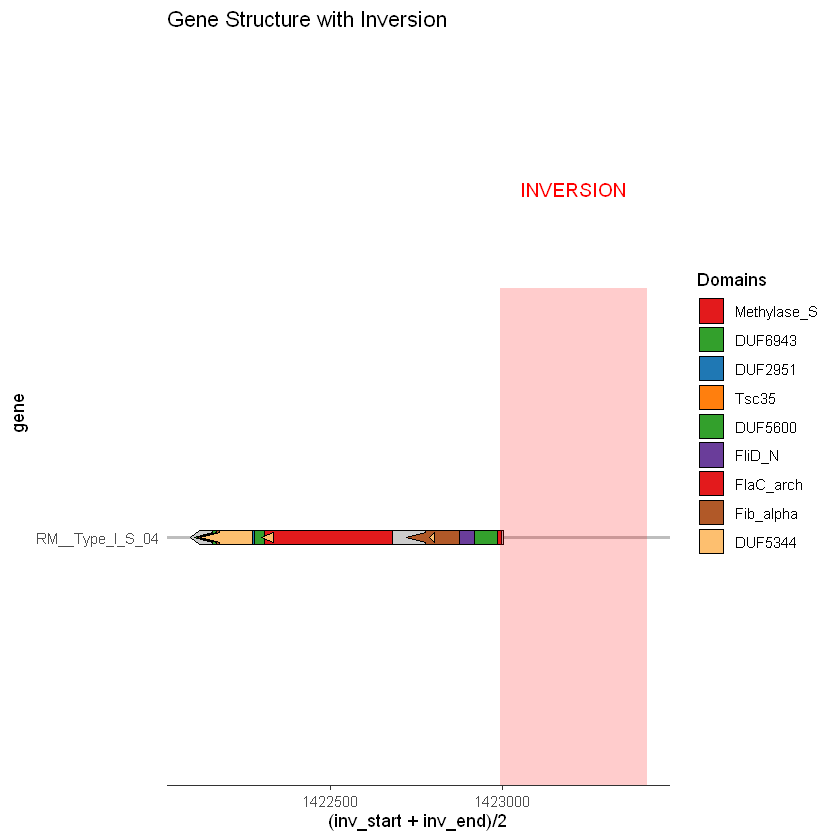

In [29]:
genes <- data.frame(
  molecule = "NZ_LR698957.1",
  gene = c("RM__Type_I_S_04"),
  start = c(1422093),
  end = c(1423004),
  strand = c("-"),
  stringsAsFactors = FALSE
)

# Domains data
domains <- data.frame(
  molecule = "NZ_LR698957.1",
  gene = c("RM__Type_I_S_04"),
  start = c(1422099, 1422417, 1422111, 1422789, 1422210, 1422816, 1422204, 1422849, 1422207, 1422864, 1422177, 1422906, 1422240, 1422825, 1422222, 1422858, 1422294, 1422762, 1422822),
  end = c(1422255, 1422927, 1422321, 1422984, 1422279, 1422933, 1422306, 1422984, 1422336, 1422993, 1422315, 1422978, 1422297, 1422936, 1422375, 1422984, 1422309, 1422798, 1422975),
  domain = c("Methylase_S", "Methylase_S", "DUF6943", "DUF6943", "DUF2951", "DUF2951", "Tsc35", "Tsc35", "DUF5600", "DUF5600", "FliD_N", "FliD_N", "FlaC_arch", "FlaC_arch", "Fib_alpha", "Fib_alpha", "DUF5344", "DUF5344", "DUF5344"),
  stringsAsFactors = FALSE
)

# Inversion data
inversion <- data.frame(
  molecule = "NZ_LR698957.1",
  inv_start = 1422995,
  inv_end = 1423422,
  stringsAsFactors = FALSE
)

adjust_domains <- function(gene_data, domain_data) {
  if (gene_data$strand == "-") {
    gene_length <- gene_data$end - gene_data$start
    # Пересчет координат доменов
    domain_data$new_start <- gene_data$end - domain_data$end + gene_data$start
    domain_data$new_end <- gene_data$end - domain_data$start + gene_data$start
    # Обновляем start и end
    domain_data$start <- domain_data$new_start
    domain_data$end <- domain_data$new_end
    domain_data$new_start <- NULL
    domain_data$new_end <- NULL
  }
  return(domain_data)
}

# Корректируем домены (если ген на "-" цепи)
domains_corrected <- adjust_domains(genes[1, ], domains)

# Визуализация
ggplot() +
  # Ген (стрелка автоматически учтет strand)
  geom_gene_arrow(
    data = genes,
    aes(xmin = start, xmax = end, y = gene, fill = gene, forward = FALSE),
    arrowhead_height = unit(3, "mm"),
    arrowhead_width = unit(2, "mm")
  ) +
  # Домены (уже пересчитаны, если нужно)
  geom_subgene_arrow(
    data = domains_corrected,
    aes(xmin = start, xmax = end, y = gene, fill = domain,
        xsubmin = start, xsubmax = end, forward = FALSE),
    arrowhead_height = unit(2, "mm")
  ) +
  # 3. Inversion region
  geom_rect(
    data = inversion,
    aes(xmin = inv_start, xmax = inv_end, 
        ymin = 0.5, ymax = length(unique(genes$gene)) + 0.5),
    fill = "red", alpha = 0.2, inherit.aes = FALSE
  ) +
  
  # 4. Inversion label
  geom_text(
    data = inversion,
    aes(x = (inv_start + inv_end)/2, 
        y = length(unique(genes$gene)) + 0.7,
        label = "INVERSION"),
    color = "red", size = 4, inherit.aes = FALSE
  ) +
  
  # 5. Adjust theme and scales
  theme_genes() +
  scale_fill_manual(
    values = c(
      "RM__Type_I_S_04" = "gray80",
      "Methylase_S" = "#e31a1c",
      "Methylase_S" = "#e31a1c",
      "DUF6943" = "#33a02c",
      "DUF6943" = "#33a02c",
      "DUF2951" = "#1f78b4", 
      "DUF2951" = "#1f78b4",
      "Tsc35" = "#ff7f0e",
      "Tsc35" = "#ff7f0e",
      "DUF5600" = "#33a02c",
      "DUF5600" = "#33a02c",
      "FliD_N" = "#6a3d9a",
      "FliD_N" = "#6a3d9a", 
      "FlaC_arch" = "#e31a1c",
      "FlaC_arch" = "#e31a1c",
      "Fib_alpha" = "#b15928",
      "Fib_alpha" = "#b15928",
      "DUF5344" = "#fdbf6f", 
      "DUF5344" = "#fdbf6f", 
      "DUF5344" = "#fdbf6f"
    ),
    breaks = c("Methylase_S", "Methylase_S", "DUF6943", "DUF6943", "DUF2951", "DUF2951", "Tsc35", "Tsc35", "DUF5600", "DUF5600", "FliD_N", "FliD_N", "FlaC_arch", "FlaC_arch", "Fib_alpha", "Fib_alpha", "DUF5344", "DUF5344", "DUF5344")
    ) +
  labs(title = "Gene Structure with Inversion",
       fill = "Domains") +
  scale_y_discrete(expand = expansion(add = c(0.5, 1)))  # Adjust y-axis padding

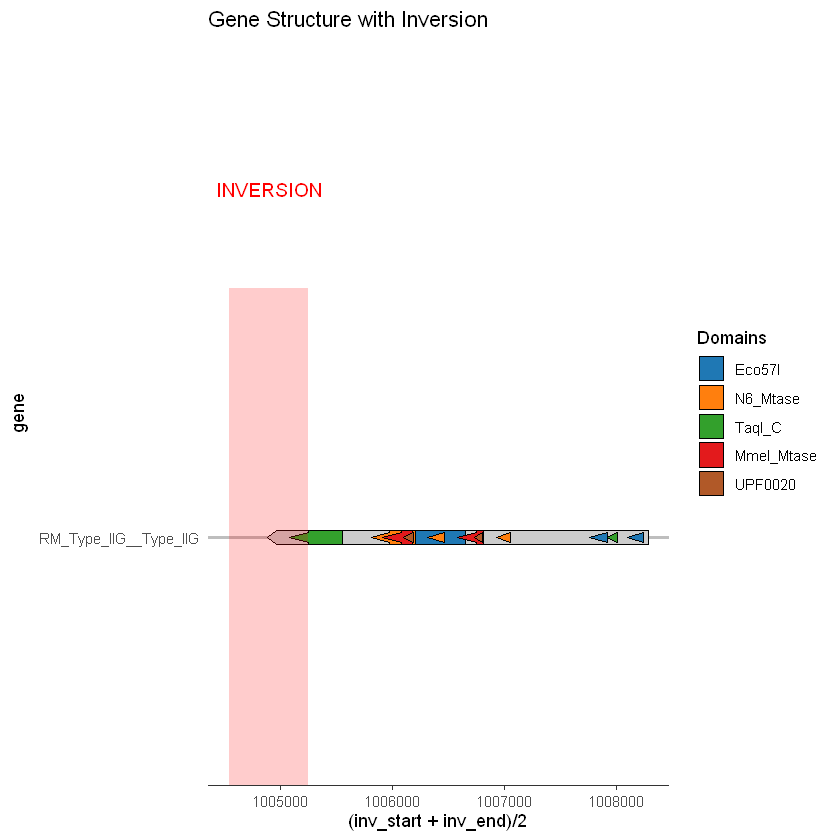

In [30]:
genes <- data.frame(
  molecule = "NZ_LR134404.1",
  gene = c("RM_Type_IIG__Type_IIG"),
  start = c(1004881),
  end = c(1008288),
  strand = c("-"),
  stringsAsFactors = FALSE
)

# Domains data
domains <- data.frame(
  molecule = "NZ_LR134404.1",
  gene = c("RM_Type_IIG__Type_IIG"),
  start = c(1004926, 1005247, 1006519, 1007869, 1006114, 1006363, 1006702, 1006963, 1005157, 1007620, 1006357, 1006996, 1006366, 1006981),
  end = c(1005067, 1005412, 1007272, 1007875, 1006237, 1006591, 1006855, 1007362, 1005250, 1008088, 1006591, 1007257, 1006435, 1007074),
  domain = c("Eco57I", "Eco57I", "Eco57I", "Eco57I", "N6_Mtase", "N6_Mtase", "N6_Mtase", "N6_Mtase", "TaqI_C", "TaqI_C", "MmeI_Mtase", "MmeI_Mtase", "UPF0020", "UPF0020"),
  stringsAsFactors = FALSE
)

# Inversion data
inversion <- data.frame(
  molecule = "NZ_LR134404.1",
  inv_start = 1004538,
  inv_end = 1005252,
  stringsAsFactors = FALSE
)

adjust_domains <- function(gene_data, domain_data) {
  if (gene_data$strand == "-") {
    gene_length <- gene_data$end - gene_data$start
    # Пересчет координат доменов
    domain_data$new_start <- gene_data$end - domain_data$end + gene_data$start
    domain_data$new_end <- gene_data$end - domain_data$start + gene_data$start
    # Обновляем start и end
    domain_data$start <- domain_data$new_start
    domain_data$end <- domain_data$new_end
    domain_data$new_start <- NULL
    domain_data$new_end <- NULL
  }
  return(domain_data)
}

# Корректируем домены (если ген на "-" цепи)
domains_corrected <- adjust_domains(genes[1, ], domains)

# Визуализация
ggplot() +
  # Ген (стрелка автоматически учтет strand)
  geom_gene_arrow(
    data = genes,
    aes(xmin = start, xmax = end, y = gene, fill = gene, forward = FALSE),
    arrowhead_height = unit(3, "mm"),
    arrowhead_width = unit(2, "mm")
  ) +
  # Домены (уже пересчитаны, если нужно)
  geom_subgene_arrow(
    data = domains_corrected,
    aes(xmin = start, xmax = end, y = gene, fill = domain,
        xsubmin = start, xsubmax = end, forward = FALSE),
    arrowhead_height = unit(2, "mm")
  ) +
  
  # 3. Inversion region
  geom_rect(
    data = inversion,
    aes(xmin = inv_start, xmax = inv_end, 
        ymin = 0.5, ymax = length(unique(genes$gene)) + 0.5),
    fill = "red", alpha = 0.2, inherit.aes = FALSE
  ) +
  
  # 4. Inversion label
  geom_text(
    data = inversion,
    aes(x = (inv_start + inv_end)/2, 
        y = length(unique(genes$gene)) + 0.7,
        label = "INVERSION"),
    color = "red", size = 4, inherit.aes = FALSE
  ) +
  
  # 5. Adjust theme and scales
  theme_genes() +
  scale_fill_manual(
    values = c(
      "RM_Type_IIG__Type_IIG" = "gray80",
      "Eco57I" = "#1f78b4", 
      "Eco57I" = "#1f78b4",
      "Eco57I" = "#1f78b4",
      "N6_Mtase" = "#ff7f0e",
      "N6_Mtase" = "#ff7f0e",
      "N6_Mtase" = "#ff7f0e",
      "N6_Mtase" = "#ff7f0e",
      "TaqI_C" = "#33a02c",
      "TaqI_C" = "#33a02c", 
      "MmeI_Mtase" = "#e31a1c",
      "MmeI_Mtase" = "#e31a1c",
      "UPF0020" = "#b15928",
      "UPF0020" = "#b15928"
    ),
    breaks = c("Eco57I", "Eco57I", "Eco57I", "Eco57I", "N6_Mtase", "N6_Mtase", "N6_Mtase", "N6_Mtase", "TaqI_C", "TaqI_C", "MmeI_Mtase", "MmeI_Mtase", "UPF0020", "UPF0020")
    ) +
  labs(title = "Gene Structure with Inversion",
       fill = "Domains") +
  scale_y_discrete(expand = expansion(add = c(0.5, 1)))  # Adjust y-axis padding

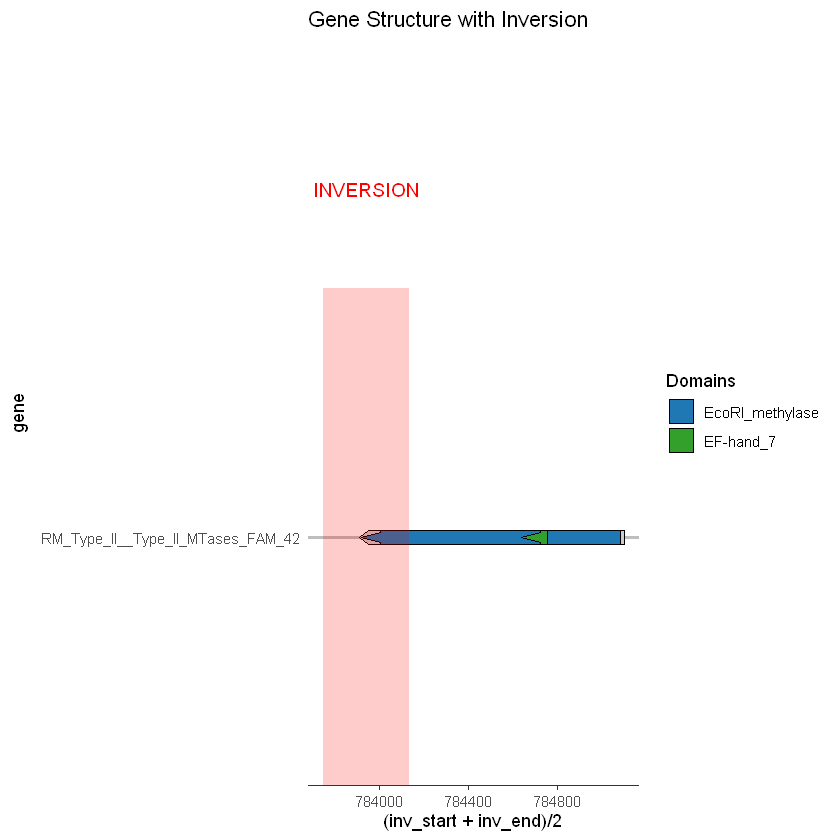

In [32]:
genes <- data.frame(
  molecule = "NZ_CP022412.2",
  gene = c("RM_Type_II__Type_II_MTases_FAM_42"),
  start = c(783909),
  end = c(785102),
  strand = c("-"),
  stringsAsFactors = FALSE
)

# Domains data
domains <- data.frame(
  molecule = "NZ_CP022412.2",
  gene = c("RM_Type_II__Type_II_MTases_FAM_42"),
  start = c(783924, 784254),
  end = c(785094, 784371),
  domain = c("EcoRI_methylase", "EF-hand_7"),
  stringsAsFactors = FALSE
)

# Inversion data
inversion <- data.frame(
  molecule = "NZ_CP022412.2",
  inv_start = 783747,
  inv_end = 784134,
  stringsAsFactors = FALSE
)

adjust_domains <- function(gene_data, domain_data) {
  if (gene_data$strand == "-") {
    gene_length <- gene_data$end - gene_data$start
    # Пересчет координат доменов
    domain_data$new_start <- gene_data$end - domain_data$end + gene_data$start
    domain_data$new_end <- gene_data$end - domain_data$start + gene_data$start
    # Обновляем start и end
    domain_data$start <- domain_data$new_start
    domain_data$end <- domain_data$new_end
    domain_data$new_start <- NULL
    domain_data$new_end <- NULL
  }
  return(domain_data)
}

# Корректируем домены (если ген на "-" цепи)
domains_corrected <- adjust_domains(genes[1, ], domains)

# Визуализация
ggplot() +
  # Ген (стрелка автоматически учтет strand)
  geom_gene_arrow(
    data = genes,
    aes(xmin = start, xmax = end, y = gene, fill = gene, forward = FALSE),
    arrowhead_height = unit(3, "mm"),
    arrowhead_width = unit(2, "mm")
  ) +
  # Домены (уже пересчитаны, если нужно)
  geom_subgene_arrow(
    data = domains_corrected,
    aes(xmin = start, xmax = end, y = gene, fill = domain,
        xsubmin = start, xsubmax = end, forward = FALSE),
    arrowhead_height = unit(2, "mm")
  ) +
  # 3. Inversion region
  geom_rect(
    data = inversion,
    aes(xmin = inv_start, xmax = inv_end, 
        ymin = 0.5, ymax = length(unique(genes$gene)) + 0.5),
    fill = "red", alpha = 0.2, inherit.aes = FALSE
  ) +
  
  # 4. Inversion label
  geom_text(
    data = inversion,
    aes(x = (inv_start + inv_end)/2, 
        y = length(unique(genes$gene)) + 0.7,
        label = "INVERSION"),
    color = "red", size = 4, inherit.aes = FALSE
  ) +
  
  # 5. Adjust theme and scales
  theme_genes() +
  scale_fill_manual(
    values = c(
      "RM_Type_II__Type_II_MTases_FAM_42" = "gray80",
      "EcoRI_methylase" = "#1f78b4",
      "EF-hand_7" = "#33a02c"
    ),
    breaks = c("EcoRI_methylase", "EF-hand_7")
    ) +
  labs(title = "Gene Structure with Inversion",
       fill = "Domains") +
  scale_y_discrete(expand = expansion(add = c(0.5, 1)))  # Adjust y-axis padding